In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import scipy.stats as stats
from scipy.stats import laplace

##### Simulation
- The true linear equation
$$ y = 3.5 - 2x $$

- Regression
$$ y_i = \beta_0 + \beta_1x_1 + e_i $$

- Distribution of $\epsilon_i'$ : **Laplace Distribution**
$$ f(\varepsilon_i) = \frac{1}{\lambda}e^{-\frac{1}{\lambda}|\varepsilon_i|}

(array([  1.,   0.,   5.,   5.,  15.,  21.,  53., 119., 250., 291., 108.,
         74.,  33.,  14.,   7.,   2.,   0.,   0.,   1.,   1.]),
 array([-6.75874895, -6.02077921, -5.28280947, -4.54483974, -3.80687   ,
        -3.06890026, -2.33093052, -1.59296079, -0.85499105, -0.11702131,
         0.62094842,  1.35891816,  2.0968879 ,  2.83485763,  3.57282737,
         4.31079711,  5.04876685,  5.78673658,  6.52470632,  7.26267606,
         8.00064579]),
 <BarContainer object of 20 artists>)

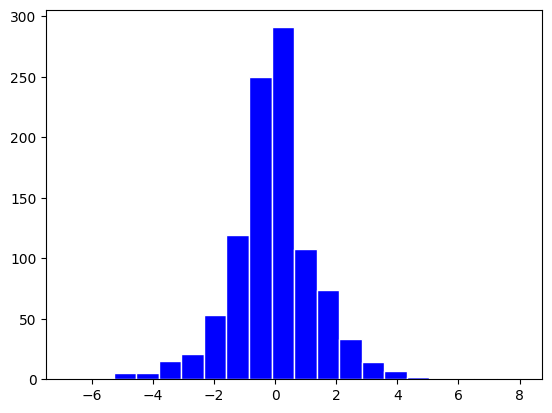

In [42]:
epsilon = laplace.rvs(size=1000)
plt.hist(epsilon, color='blue', edgecolor='white', bins=20)

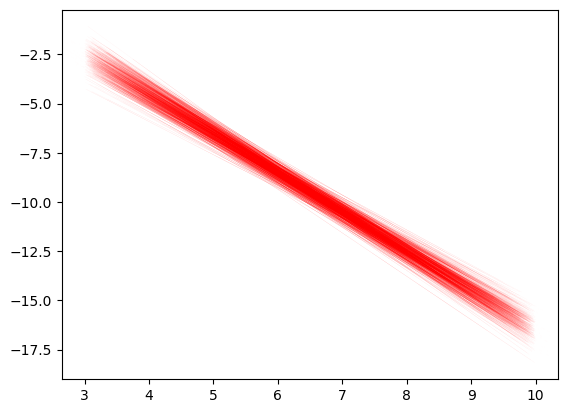

In [43]:
M = 500
b1vec = [0.0] * M
b0vec = [0.0] * M
for i in range(M):
    epsilon = laplace.rvs(size = n)
    x = np.random.uniform(3, 10, size=n)
    y = 3.5 - 2 * x + epsilon
    truey = 3.5 - 2 * x
    b1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
    b0 = np.mean(y) - b1 * np.mean(x)
    estimated_y = b0 + b1 * x

    b1vec[i] = b1
    b0vec[i] = b0
    plt.plot(x, estimated_y, color='red', lw=0.01, alpha=0.5)

b1hat = -1.9916 with std = 0.1239
b0hat = 3.4426 with std = 0.8405


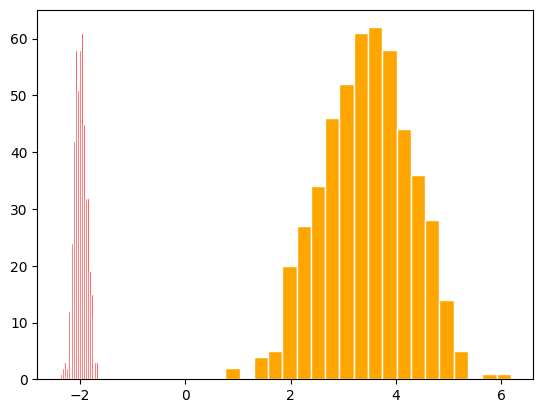

In [44]:
plt.hist(b0vec, color='orange', edgecolor='white', bins=20)
plt.hist(b1vec, color='red', edgecolor='white', bins=20)

print(f"b1hat = {np.mean(b1vec):.4f} with std = {np.std(b1vec):.4f}")
print(f"b0hat = {np.mean(b0vec):.4f} with std = {np.std(b0vec):.4f}")
plt.show()

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,10,13])

n = len(y)
lr1 = 0.01
lr0 = 0.005

M = 6000
b0, b1 = 0, 0

for i in range(M):
    yhat = b0 + b1 * x
    d_b0 = (-2 / n) * np.sum((y - yhat))
    d_b1 = (-2 / n) * np.sum((y - yhat) * x)

    b1 = b1 - lr1 * d_b1
    b0 = b0 - lr0 * d_b0

    if i % 200 == 0:
        print(f"Iteration {i}: b0 = {b0:.4f}, b1 = {b1:.4f}")



Iteration 0: b0 = 0.0880, b1 = 0.6040
Iteration 200: b0 = 1.1773, b1 = 2.4286
Iteration 400: b0 = 1.7462, b1 = 2.2722
Iteration 600: b0 = 2.1467, b1 = 2.1621
Iteration 800: b0 = 2.4288, b1 = 2.0845
Iteration 1000: b0 = 2.6274, b1 = 2.0299
Iteration 1200: b0 = 2.7672, b1 = 1.9915
Iteration 1400: b0 = 2.8657, b1 = 1.9644
Iteration 1600: b0 = 2.9350, b1 = 1.9454
Iteration 1800: b0 = 2.9838, b1 = 1.9319
Iteration 2000: b0 = 3.0182, b1 = 1.9225
Iteration 2200: b0 = 3.0424, b1 = 1.9158
Iteration 2400: b0 = 3.0594, b1 = 1.9111
Iteration 2600: b0 = 3.0714, b1 = 1.9079
Iteration 2800: b0 = 3.0799, b1 = 1.9055
Iteration 3000: b0 = 3.0858, b1 = 1.9039
Iteration 3200: b0 = 3.0900, b1 = 1.9027
Iteration 3400: b0 = 3.0930, b1 = 1.9019
Iteration 3600: b0 = 3.0951, b1 = 1.9014
Iteration 3800: b0 = 3.0965, b1 = 1.9010
Iteration 4000: b0 = 3.0975, b1 = 1.9007
Iteration 4200: b0 = 3.0983, b1 = 1.9005
Iteration 4400: b0 = 3.0988, b1 = 1.9003
Iteration 4600: b0 = 3.0991, b1 = 1.9002
Iteration 4800: b0 = 3.

In [53]:
x = np.array([180.8, 66.1, 228.3, 136.2, 237.4, 123.1, 96.2, 248.4, 18.7])
y= np.array([12.9, 8.6, 15.5, 13.2, 18.9, 15.2, 11.4, 20.2, 6.7])

X = x
X = sm.add_constant(X) # do the gradient descent method after standardised value
results = sm.OLS(y, X).fit()
display(results.summary())

x_mean = np.mean(x)
x_std = np.std(x)
x_scaled = (x - x_mean) / x_std
lr = 0.1
b0, b1 = 0, 0
n, M = len(y), 100
for i in range(M):
    y_pred = b0 + b1 * x_scaled
    error = y_pred - y
    b1 = b1 - lr * ((2/n) * np.sum((y_pred - y) * x_scaled))
    b0 = b0 - lr * ((2/n) * np.sum((y_pred - y)))
    if i % 5 == 0:
        print(f"Iteration {i}: b0 = {b0:.4f}, b1 = {b1:.4f}")

final_b1 = b1 / x_std
final_b0 = b0 - final_b1 * x_mean
print(f"GD Result y = {final_b0:.3f} + {final_b1:.3f}x")

/Users/vanessamae/Documents/playground/python/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     41.69
Date:                Thu, 08 Jan 2026   Prob (F-statistic):           0.000348
Time:                        09:27:56   Log-Likelihood:                -16.877
No. Observations:                   9   AIC:                             37.75
Df Residuals:                       7   BIC:                             38.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1385      1.303      4.709      0.002       3.056       9.221
x1             0.0504      0.008      6.457      0.000       0.032       0.069
==============================================================================
Omnibus:                        0.032   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.230
Skew:                           0.099   Prob(JB):                        0.891
Kurtosis:                       2.242   Cond. No.                         365.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Iteration 0: b0 = 2.7244, b1 = 0.7703
Iteration 5: b0 = 10.0512, b1 = 2.8418
Iteration 10: b0 = 12.4521, b1 = 3.5206
Iteration 15: b0 = 13.2388, b1 = 3.7430
Iteration 20: b0 = 13.4966, b1 = 3.8159
Iteration 25: b0 = 13.5811, b1 = 3.8398
Iteration 30: b0 = 13.6087, b1 = 3.8476
Iteration 35: b0 = 13.6178, b1 = 3.8502
Iteration 40: b0 = 13.6208, b1 = 3.8510
Iteration 45: b0 = 13.6217, b1 = 3.8513
Iteration 50: b0 = 13.6221, b1 = 3.8514
Iteration 55: b0 = 13.6222, b1 = 3.8514
Iteration 60: b0 = 13.6222, b1 = 3.8514
Iteration 65: b0 = 13.6222, b1 = 3.8514
Iteration 70: b0 = 13.6222, b1 = 3.8514
Iteration 75: b0 = 13.6222, b1 = 3.8514
Iteration 80: b0 = 13.6222, b1 = 3.8514
Iteration 85: b0 = 13.6222, b1 = 3.8514
Iteration 90: b0 = 13.6222, b1 = 3.8514
Iteration 95: b0 = 13.6222, b1 = 3.8514
GD Result y = 6.139 + 0.050x
